# Artificial Neural Networks with Keras

* ANNs are at the very core of deep learning.

# A. From Biological to Artificial Neurons:

### A.1 Biological Neurons:

* A biological Neuron: <br>
&emsp; 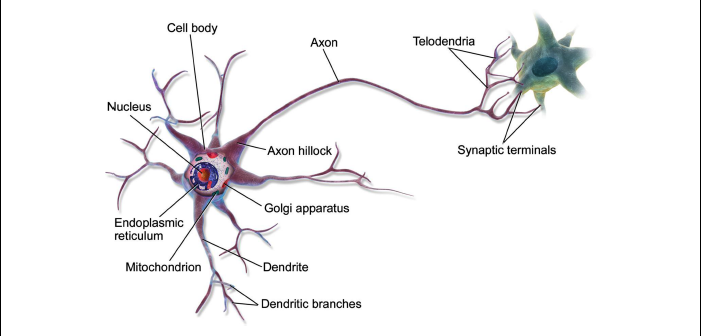

* Biological neurons produce short electrical impulses called *action potentials (APs, or just signals)*, which travel along the axons and make the synapses release chemical signals called *neurotransmitters*.
* When a neuron receives a sufficient amount of these neurotransmitters within a few milliseconds, it fires its own electrical impulses (but actually, it depends on the neurotransmitters, as some of them inhibit the neuron from firing).
* Highly complex computations can be performed by a network of fairly simple neurons, much like a complex anthill can emerge from the combined efforts of simple ants.
* The architecture of biological neural networks (BNNs) is the subject of active research, but some parts of the brain have been mapped. These efforts show that neurons are often organized in consecutive layers, especially in the cerebral cortex (the outer layer of the brain).

### A.2. Logical Computations w/ Neurons:

* Artificial neuron
    * It has one or more binary (on/off) inputs and one binary output.
    * The artificial neuron activates its output when more than a certain number of its inputs are active.
    * Such a simplified model it is possible to build a network of artificial neurons that can compute any logical proposition you want.

* ANNs performing simple logical Computations: <br>
&emsp; 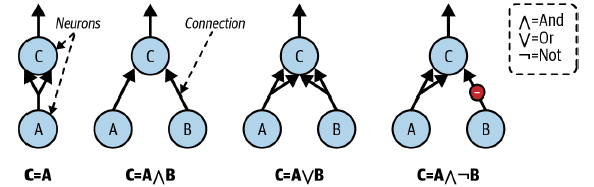
* $C\ =\ A$ : identity function, neuron C is activated if neuron A is activated, and v. versa.
* $C\ =\ A\ \wedge\ B$ : Logical AND, neuron is activated only when both neurons A and B are activated.
* $C\ =\ A\ \vee\ B$ : Logical OR, neuron C gets activated if either neuron A or neuron B is activated (or both).
* $C\ =\ A\ \wedge\ \rightharpoondown\ B$: Logical NOT, neuron C is activated only if neuron A is active and neuron B is off. If neuron A is active all the time, then you get a logical NOT: neuron C is active when neuron B is off, and vice versa.

### A.3. The Perceptron:

*  The perceptron is based on a slightly different artifical neuron called a *THRESHOLD LOGIC UNIT (TLU)* or *LINEAR THRESHOLD UNIT (LTU)*.
    * The inputs and outputs are numbers (instead of binary on/off values), and each input connection is associated w/ a weight.
    * The TLU first computes a linear function of its inputs: <br>
        &emsp; $z\ =\ w_1x_1\ +\ w_2x_2\ +...+\ w_nx_n\ +\ b\ =\ w^Tx+b$
    * Then the TLU applies a step function to the result:<br>
        &emsp; $h_w(x)\ =\ step(z)$ <br>
        &emsp; 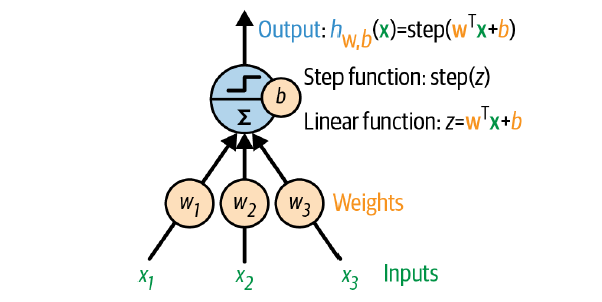

* Common step functions used in perceptrons (assuming threshold=0).
    * Heaviside Step Function: <br>
    &emsp; $heaviside(z) = \max \begin{dcases} \mathrm{0\ if\ z<0}  \\ \mathrm{1\ if\ z\geq0}  \\  \end{dcases}$
    * Sign Function: <br>
    &emsp; $sgn(z) = \max \begin{dcases} \mathrm{-1\ if\ z<0}  \\ \mathrm{0\ if\ z=0}  \\  \mathrm{+1\ if\ z>0}  \end{dcases}$

* A perceptron is composed of one or more TLUs organized in a single layer, where every TLU is connected to every input. Such a layer is called a fully connected layer, or a dense layer. The inputs constitute the input layer. And since the layer of TLUs produces the final outputs, it is called the output layer. <br>
&emsp; 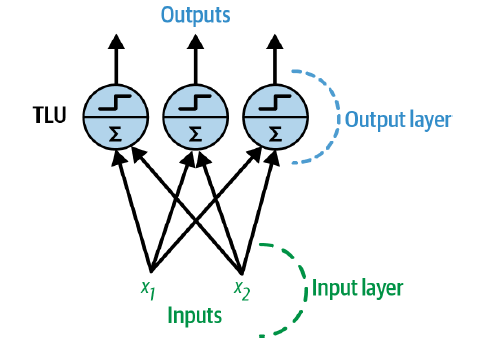
    * Computing the outputs of a fully connected layer: <br>
    &emsp; $h_{W,b}(X)\ =\ \phi(XW\ +\ b)$, where:
        * $X$ represents the matrix of input features. It has one row per instance and one column per feature.
        * $W$ is the weight matrix that contains all the connection weights. It has one row per input and once column per neuron.
        * $b$ is the bias vector that contains all the bias terms: one per neuron.
        * function $\phi$ is the ACTIVATION FUNCTION : when the artificial neurons are TLUs, it is a step function.

* How is a perceptron trained?
    * Hebb's Rule:
        * When a biological neuron triggers another neuron often, the connection between these two neurons grows stronger. The connection weight between two neurons tends to increase when they fire simultaneously.
    * Perceptrons are trained using a variant of Hebb's rule that takes into account the error made by the network when it makes a prediction. The perceptron learning rule reinforces connections that help reduce the error.
        * The perceptron is fed one training instances at a time, and for each instance it makes its predictions.
        * For every output neuron that produced the wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction.
        * Perceptron Learning Rule (Weight Update): <br>
        &emsp; $w_{i,j}^{(next\ step)}\ =\ w_{i,j}\ +\ \eta(y_j\ -\ \hat{y}_j)x_i $ , <br>where:
            * $w_{i,j}$ = connection weight between the $i^{th}$ input and the $j^{th}$ neuron.
            * $x_i$ = the $i^{th}$ input value of the current training instance.
            * $\hat{y}_j$ = target output of the $j^{th}$ output neuron for the current training instance.
            * $\eta$ = learning rate.

* `sklearn.linear_model.Perceptron` class
    * Equivalent to using an `SGDClassifier` w/ hyperparameters : 
        * `loss="perceptron", learning_rate="constant", eta0=1, penalty="None"`

* Perceptrons are incapable of solving some trivial problems , e.g., the exclusive OR (XOR) classification problem. But this can be eliminated by stacking multiple perceptrons. The resulting ANN is called a multilayer perceptron (MLP). 
    * XOR Classification problem and an MLP that solves it (right): <br>
    &emsp; 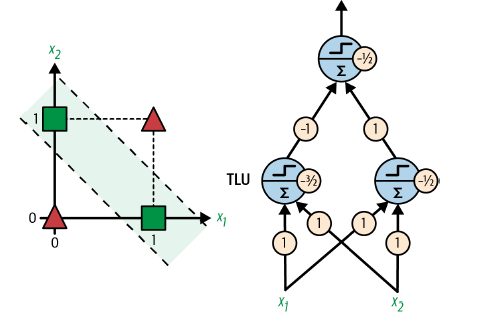

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # sample Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)
y_pred

array([ True, False])

### A.4. The Multilayer Perceptron and Backpropagation:
* An MLP is composed of one input layer, one or more layers of TLUs called hidden layers, and one final layer of TLUs called the output layer.
    * The layers close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upper layers.
    * Example : Architecture of a multilayer perceptron w/ 2 inputs, 1 hidden layer of 4 neurons, and 3 output neurons. <br>
    &emsp; 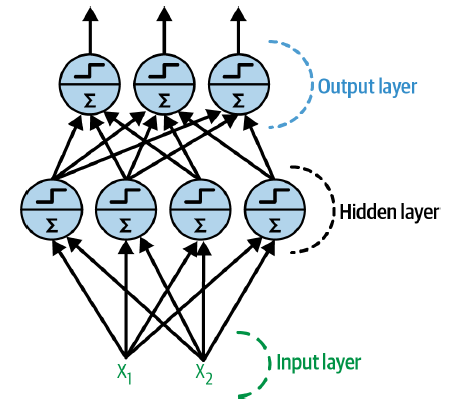
    * The signals flow only in one direction (from inputs to the outputs), so this architecture is an example of a *feedforward neural network (FNN)*.

* When an ANN contains deep stack of hidden layers, it is called a **deep neural network (DNN)**. 
    * The field of deep learning studies DNNs, and more generally it is interested in models containing deep stacks of computations.

* Backpropagation:
    * Is a training technique for neural networks that makes predictions for a mini-batch (forward pass), measures the error, then goes through each layer in reverse to measure the error contribution from each parameter(reverse pass) and finally tweaks the connection weights and biases  to reduce the error (gradient descent step):
    * More specifically:
        * It handles one mini-batch at a time (for example, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an epoch.
        * Each mini-batch enters the network through the input layer. The algorithm then computes the output of all the neurons in the first hidden layer, for every instance in the mini-batch. The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the forward pass: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.
        * Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).
        * Then it computes how much each output bias and each connection to the output layer contributed to the error. This is done analytically by applying the chain rule.
        * The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward until it reaches the input layer. This reverse pass efficiently measures the error gradient across all the connection weights and biases in the network by propagating the error gradient backward through the network.
        * Finally, the algorithm performs a gradient descent step to tweak all the connection weights in the network, using the error gradients it just computed.

* It is important to initialized all the hidden layers' connnection weights randomly, or else training will fail.
    * For example, if you initialize all weights and biases to zero, then all neurons in a given layer will be perfectly identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical. 
    * In other words, despite having hundreds of neurons per layer, your model will act as if it had only one neuron per layer: it won’t be too smart. If instead you randomly initialize the weights, you break the symmetry and allow backpropagation to train a diverse team of neurons.

* Activation Functions:
    * If there is no nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and that cannot solve very complex problems. Conversely, a large enough DNN w/ nonlinear activations can theoritically approximate any continuous function.
    * Common Activation Functions:
        * Sigmoid Function : $\sigma(z)\ =\Large\frac{1}{1 + \mathrm{exp}(-z)}$.
            * Has a well-defined nonzero derivative everywhere, allowing gradient descent to make some progress at every step.
        * Hyperbolic Tangent Function: $\mathrm{tanh}(z)\ =\ 2\sigma(2z)\ -\ 1 $
            * Just like the sigmoid function, this activation function is S-shaped, continuous, and differentiable, but its output value ranges from –1 to 1 (instead of 0 to 1 in the case of the sigmoid function). That range tends to make each layer’s output more or less centered around 0 at the beginning of training, which often helps speed up convergence.
        * Rectified Linear Unit Function: $\mathrm{ReLU}(z)\ =\ \mathrm{max}(0, z)$
            * ReLU function is continuous bet not differentiable at z=0, and its derivative is 0 for z <0. In practice, however, it works very well and has the advantage of being fast to compute, so it has become the default.

(-4.5, 4.5, -0.2, 1.2)

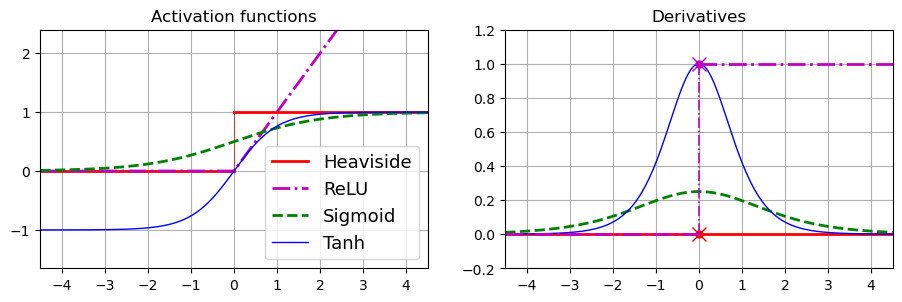

In [3]:
from scipy.special import expit as sigmoid
import matplotlib.pyplot as plt

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

### A.5. Regression MLPs:
* MLPs can be used for regression tasks.
    * To predict a single value, a single output neuron is needed: its output is the predicted value.
    * For multivariate regression, one output neuron per output dimension is needed. For example, to locate the center of an object in an image, you need to predict two coordinates, so you need 2 output neurons.

* `sklearn.neural_network.MLPRegressor`:
    * Scaling is important for MLPs because they are trained using gradient descent. 
        * Gradient Descent does not converge very well when the features have very different scales.
    * `MLPRegressor` does not support activation functions in the output layer.
    * Typical regression MLP Architecture: <br>
    &emsp;  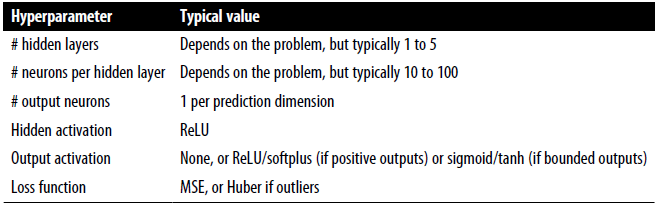

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [5]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

In [6]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

### A.6.Classification MLPs:

* MLPs can also be used for classification tasks.
    * For a binary classification problem, you just need a single output neuron using the sigmoid activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class. The estimated probability of the negative class is equal to one minus that number.
    * MLPs can also handle multilabel binary classification tasks.
        * For example, an email classification system that predicts whether each incoming email is ham or spam, and simultaneously predicts whether it is an urgent or nonurgent email. In this case, 2 output neurons will be needed, both using the sigmoid activation function: the 1st would output the probability that the email is spam, and the 2nd would output the probability that it is urgent. More generally, you would dedicate one output neuron for each positive class. The output probabilities do not necessarily add up to 1. This lets the model output any combination of labels (e.g., nonurgent ham, urgent ham, nonurgent spam, urgent spam).
    * If each instance can belong only to a single class, out of 3 or more possible classes (classes 0 to 9 for digit image classification), then you need to have one output neuron per class, and you should use the softmax activation function for the whole output layer.
        * The softmax function will ensure that all the estimated probabilities are between 0 and 1 and that they add up to 1, since the classes are exclusive.
    * Regarding the loss function, since we are predicting probability distributions, the cross-entropy loss is generally a good choice.
    
* `sklearn.neural_network.MLPClassifier`:
    * Minimizes the cross entropy rather than the MSE (`MLPRegressor`).
    * Typicaly classification MLP architecture: <br>
    &emsp; 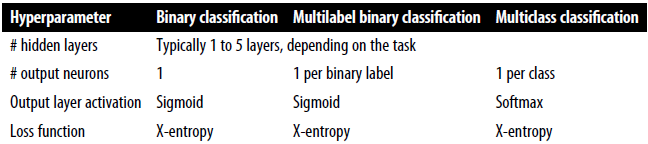

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

# B. Implementing MLPs with `Keras`:

### B.1. Building an Image Classifier Using the Sequential API

* `Sequential` model:
    * simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially

* `tf.keras.layers.Input`:
    * Keras needs to know the shape of the inputs so it can determine the shape of the connection weight matrix of the first hidden layer.

* `tf.keras.layers.Flatten`:
    * Convert each input into a 1D array. It receives input data X, it computes `X.reshape(-1, 784)`.
    * Doesn't have any parameters; Just for simple preprocessing.

* `tf.keras.layers.Dense`:
    * Each `Dense` layer manages its own matrix, containing all the connections weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes: <br>
        &emsp; $h_{W,b}(X)\ =\ \phi(XW\ +\ b)$

* Specifying `activation="relu"` is equivalent to specifying `activation=tf.keras.activations.relu`.
    * Other activation functions are available in the `tf.keras.activations` package.

* Each layer in the model must have a unique name, and the layer names can be set explicitly using the constructor's `name` argument.
    * Keras also handles this automatically.
    * Keras also ensures that the name is globally unique, even across models, by appending an index if needed. This makes it possible to merge models easily w/o getting name conflicts.
    * All global state managed by Keras is stored in a Keras session, w/c can be cleared using `tf.keras.backend.clear_session()`.

* All the parameters of a layer can be accessed using its `get_weights()` and `set_weights()` methods. For a `Dense` layer, this includes both the connection weights and the bias terms.
    * The `Dense` layer initializes the connections weight randomly and the biases were initialized to zeros.
    * To use  a different initialization method, set `kernel_initializer` or `bias_initializer` when creating the layer.
    * The shape of the weight matrix depends on the number of inputs.
    * If the `input_shape` is not specified, Keras will simply wait until it knows the input shape before it actually builds the model parameters.
        * This will happen during training, or when its `build()` method is called.
        * Until the model parameters are built, you will not be able to do certain things, such as display the model summary or save the model. So, if you know the input shape when creating the model, it is best to specify it.

* Compiling the model:
    * After a model is created, you must call its `compile()` method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation.
    * `loss="sparse_categorical_crossentropy"`:
        * equivalent of using `loss=tf.keras.losses.sparse_categorical_crossentropy`
        * for sparse labels (i.e., for each instance, there is just a target index) and the classes are exclusive.
        * For one target probability per class for each instance (such as one-hot bectors), `categorical_crossentropy` loss is much preferred.
        * For binary classifcation or multilable binary classifcation, use `sigmoid` activation function in the output layer instead of the `softmax` activation function, and then use the `binary_crossentropy` loss.
        * To convert sparse labels to one-hot vector labels, use `tf.keras.utils.to_categorical()` function. Use `np.argmax()` function w/ `axis=1` to go the other way around.
    * The optimizer, `"sgd"` means that we will train the model using stochastic gradient descent.
        * When using the SGD optimizer, it is important to tune the learning rate.
            * use `optimizer=tf.keras.optimizers.SGD(learning_rate=__???__)` to set the learning rate, rather than `optimizer="sgd"`, which defaults to a learning rate of `0.01`.
    
* Training and evaluating the model:
    * Pass the number of epochs to train so that the model will converge into a good solution.
    * At each epoch during training, Keras displays the number of mini-batches processed so far on the left side of the progress bar.
    * Instead of passing a validation set using the validation_data argument, you could set validation_split to the ratio of the training set that you want Keras to use for validation.
        * For example, `validation_split=0.1` tells Keras to use the last 10% of the data (before shuffling) for validation.
    * If the training set was very skewed, with some classes being overrepresented and others underrepresented, it would be useful to set the `class_weight` argument when calling the `fit()` method, to give a larger weight to underrepresented classes and a lower weight to overrepresented classes. These weights would be used by Keras when computing the loss.
    * If you need per-instance weights, set the `sample_weight` argument. If both `class_weight` and `sample_weight` are provided, then Keras multiplies them.
        * Per-instance weights could be useful, for example, if some instances were labeled by experts while others were labeled using a crowdsourcing platform: you might want to give more weight to the former.
    * You can also provide sample weights (but not class weights) for the validation set by adding them as a third item in the `validation_data` tuple.
    * The `fit()` method returns a History object containing the training parameters `(history.params)`, the list of epochs it went through `(history.epoch)`, and most importantly a dictionary `(history.history)` containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any).

    * `model.evaluate(X_test, y_test)`:
        * For evaluating the test set to estimate the generalization error


In [8]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [9]:
X_train.shape

(55000, 28, 28)

In [10]:
X_train.dtype

dtype('uint8')

In [11]:
# Scale the pixel intensities down to the 0-1 range by dividng 255.0
X_train, X_valid, X_test, = X_train/255., X_valid/255., X_test/255.

In [12]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Ankle boot'

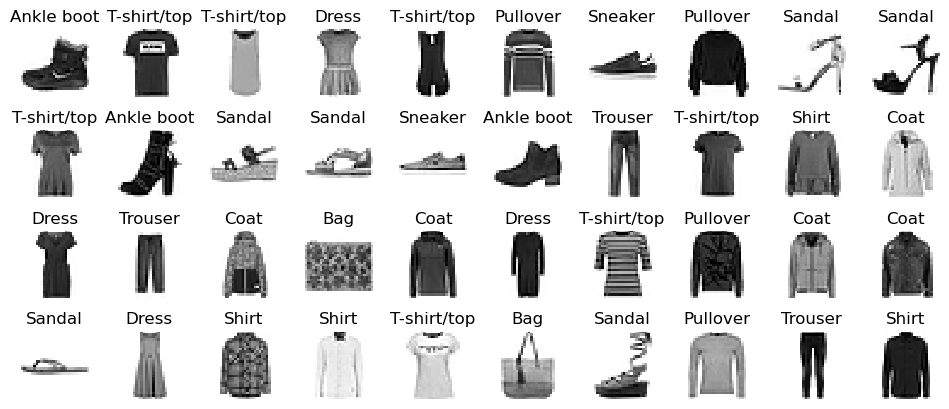

In [14]:
# Samples form the Fashion MNIST dataset
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [15]:
# Create the model using the sequential API
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax")) 

In [16]:
# Other way of implementing the Sequential model
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


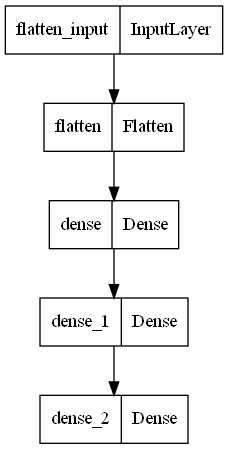

In [18]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [19]:
# Get the model's list of layers
model.layers

In [20]:
hidden1 = model.layers[1]
hidden1

In [21]:
hidden1.name

'dense'

In [22]:
model.get_layer('dense') is hidden1

True

In [23]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.01873296,  0.03698341,  0.04333185, ..., -0.04532273,
        -0.01855896,  0.02911028],
       [-0.05131554, -0.01116912,  0.00632757, ...,  0.04542482,
         0.04382566, -0.02293497],
       [-0.02282432, -0.01239901,  0.02701273, ..., -0.00014018,
        -0.0392576 ,  0.0686246 ],
       ...,
       [-0.02905162,  0.02285963,  0.06266773, ...,  0.03195906,
         0.02543541, -0.01518733],
       [-0.00447455, -0.03533923, -0.0718086 , ...,  0.03320879,
         0.0169495 ,  0.0353737 ],
       [ 0.04784293, -0.06641693, -0.01163132, ...,  0.03468925,
        -0.03311664, -0.04467227]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

In [27]:
# Compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [28]:
# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
 864/1719 [==============>...............] - ETA: 3s - loss: 0.8700 - accuracy: 0.7176

1719/1719 [==============================] - 9s 5ms/step - loss: 0.7135 - accuracy: 0.7641 - val_loss: 0.5045 - val_accuracy: 0.8236
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4857 - accuracy: 0.8315 - val_loss: 0.4596 - val_accuracy: 0.8344
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4389 - accuracy: 0.8467 - val_loss: 0.4260 - val_accuracy: 0.8496
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4145 - accuracy: 0.8545 - val_loss: 0.3967 - val_accuracy: 0.8612
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3942 - accuracy: 0.8626 - val_loss: 0.3880 - val_accuracy: 0.8622
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3781 - accuracy: 0.8669 - val_loss: 0.3965 - val_accuracy: 0.8600
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3659 - accuracy: 0.8704 - val_loss: 0.3726 - val_accuracy: 0.8688
Epo

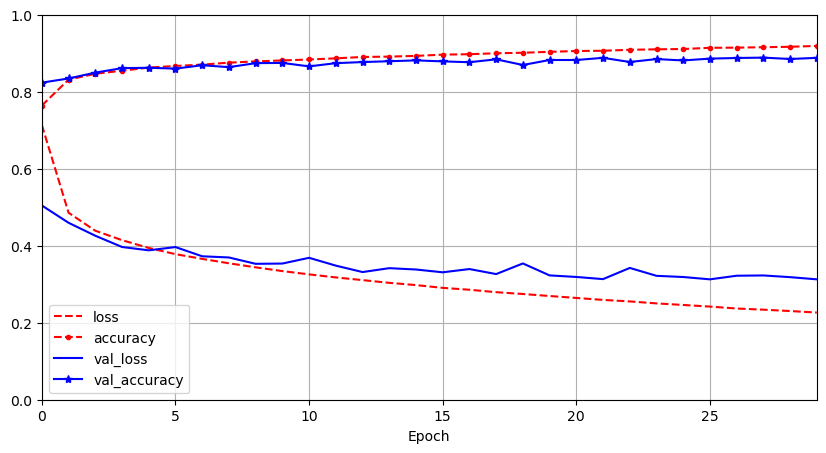

In [29]:
# Plot the learning curve
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(10, 5), 
    xlim=[0, 29], ylim=[0, 1],
    grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)

plt.show()

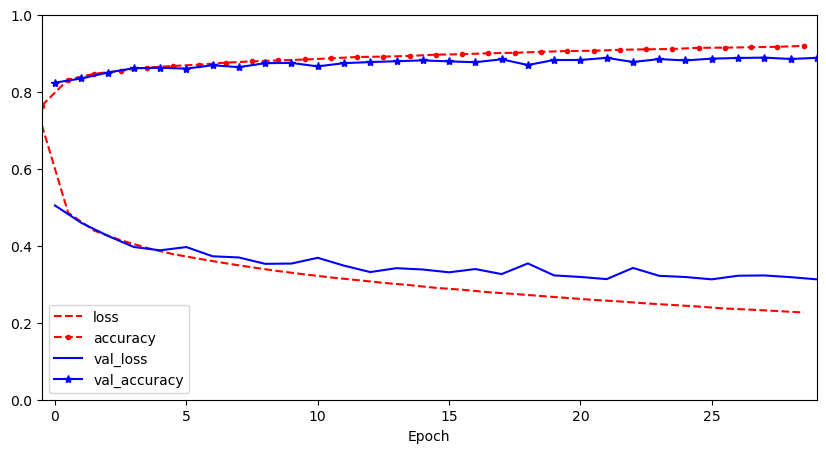

In [30]:
# shift the training curve by -1/2 epoch
plt.figure(figsize=(10, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")

In [31]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [32]:
for k, v in history.history.items():
    print(k, v[-1])


loss 0.22645194828510284
accuracy 0.9190182089805603
val_loss 0.31266269087791443
val_accuracy 0.8880000114440918


In [33]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3274 - accuracy: 0.8832


[0.3274345099925995, 0.8831999897956848]

In [34]:
# Using the model to make predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 222ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
# Get the highest probability class index for each instance
import numpy as np

y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [36]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [37]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

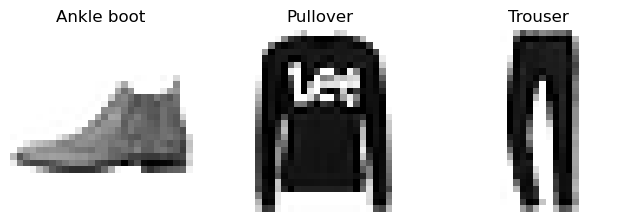

In [38]:
plt.figure(figsize=(8, 3))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

### B.2. Building A Regression MLP Using the `Sequential` API:

* The output layer has single neuron since a single value is predicted and it uses no activation function. The loss function is the MSE, the metric is the RMSE using an Adam optimizer.
* `Normalization` Layer:
    * same as sklearn's `StandardScaler` but first it must be fitted to the training data using its `adapt()` method before calling the model's `fit()` method.

In [39]:
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)   
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred 

Epoch 1/20
1719/1719 [==============================] - 11s 6ms/step - loss: 8.6114 - root_mean_squared_error: 2.9345 - val_loss: 8.4316 - val_root_mean_squared_error: 2.9039
Epoch 2/20
1719/1719 [==============================] - 9s 5ms/step - loss: 8.3120 - root_mean_squared_error: 2.8831 - val_loss: 8.3969 - val_root_mean_squared_error: 2.8979
Epoch 3/20
1719/1719 [==============================] - 8s 5ms/step - loss: 8.2890 - root_mean_squared_error: 2.8791 - val_loss: 8.3971 - val_root_mean_squared_error: 2.8979
Epoch 4/20
1719/1719 [==============================] - 8s 5ms/step - loss: 8.2808 - root_mean_squared_error: 2.8776 - val_loss: 8.4383 - val_root_mean_squared_error: 2.9050
Epoch 5/20
1719/1719 [==============================] - 8s 5ms/step - loss: 8.2711 - root_mean_squared_error: 2.8760 - val_loss: 8.3937 - val_root_mean_squared_error: 2.8974
Epoch 6/20
1719/1719 [==============================] - 8s 5ms/step - loss: 8.2606 - root_mean_squared_error: 2.8742 - val_loss: 

array([[[4.533126 ],
        [4.533126 ],
        [4.533126 ],
        [4.533126 ],
        [4.533126 ],
        [4.533126 ],
        [4.533126 ],
        [4.5389695],
        [4.553692 ],
        [4.5404553],
        [4.5681167],
        [4.5713034],
        [4.5818067],
        [4.582536 ],
        [4.587011 ],
        [4.587177 ],
        [4.5709968],
        [4.5600157],
        [4.5622797],
        [4.6071286],
        [4.604181 ],
        [4.5373096],
        [4.533126 ],
        [4.533126 ],
        [4.533126 ],
        [4.533126 ],
        [4.533126 ],
        [4.533126 ]],

       [[4.523121 ],
        [4.409777 ],
        [4.4062285],
        [4.440549 ],
        [4.425562 ],
        [4.4455676],
        [4.4320383],
        [4.459216 ],
        [4.4702787],
        [4.439108 ],
        [4.444485 ],
        [4.4480915],
        [4.442557 ],
        [4.4509125],
        [4.4516573],
        [4.4523296],
        [4.452255 ],
        [4.452121 ],
        [4.450921 ],
        [4.

In [40]:
mse_test

8.247770309448242

In [41]:
rmse_test

2.8718886375427246

### B.3. Building Complex Models Using the `Functional` API:

* Wide and Deep Neural Network:
    * It connects all or part of the inputs directly to the output layer.
    * This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). <br>
    &emsp; 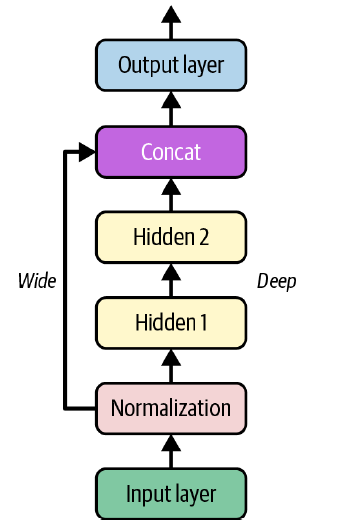
    * In contrast, a regular MLP forces all the data to flow through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations.

In [42]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [43]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [44]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 normalization (Normalization)  (None, 28, 28)       57          ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 28, 30)       870         ['normalization[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 28, 30)       930         ['dense[0][0]']                  
                                                                                              

In [45]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
1719/1719 [==============================] - 11s 6ms/step - loss: 9.3325 - root_mean_squared_error: 3.0550 - val_loss: 8.4952 - val_root_mean_squared_error: 2.9148
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 8.3342 - root_mean_squared_error: 2.8869 - val_loss: 8.4298 - val_root_mean_squared_error: 2.9036
Epoch 3/20
1719/1719 [==============================] - 8s 5ms/step - loss: 8.2950 - root_mean_squared_error: 2.8801 - val_loss: 8.4864 - val_root_mean_squared_error: 2.9132
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 8.2782 - root_mean_squared_error: 2.8772 - val_loss: 8.3931 - val_root_mean_squared_error: 2.8972
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 8.2674 - root_mean_squared_error: 2.8753 - val_loss: 8.3945 - val_root_mean_squared_error: 2.8975
Epoch 6/20
1719/1719 [==============================] - 9s 5ms/step - loss: 8.2619 - root_mean_squared_error: 2.8744 - val_loss: 

In [46]:
for k,v in history.history.items():
    print(k, v[-1])

loss 8.253363609313965
root_mean_squared_error 2.8728604316711426
val_loss 8.370770454406738
val_root_mean_squared_error 2.893413543701172


* If you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path: <br>
&emsp; 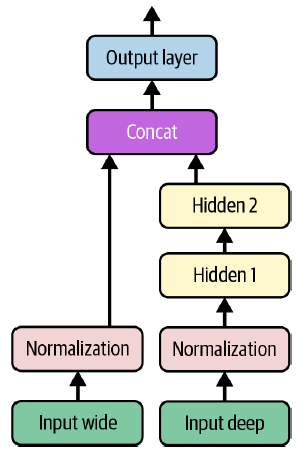

In [47]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [48]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [49]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [50]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.4042 - root_mean_squared_error: 1.1850 - val_loss: 0.8790 - val_root_mean_squared_error: 0.9375
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5126 - root_mean_squared_error: 0.7160 - val_loss: 0.8880 - val_root_mean_squared_error: 0.9423
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4382 - root_mean_squared_error: 0.6620 - val_loss: 0.4522 - val_root_mean_squared_error: 0.6725
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4099 - root_mean_squared_error: 0.6402 - val_loss: 0.4270 - val_root_mean_squared_error: 0.6535
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3973 - root_mean_squared_error: 0.6304 - val_loss: 0.3704 - val_root_mean_squared_error: 0.6086
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3834 - root_mean_squared_error: 0.6192 - val_loss: 0.3536 - val_

* Different Uses cases w/c you may want to have multiple outputs:
    * To locate and classify the main object in a picture. This is both a regression tasks and a classification task.
    * Multiple independent tasks based on the same data. You could train one neural network per task, but in many cases you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks.
        * For example, you could perform multitask classification on pictures of faces, using one output to classify the person’s facial expression (smiling, surprised, etc.) and another output to identify whether they are wearing glasses or not.
    * Another use case is as a regularization technique (i.e., a training constraint whose objective is to reduce overfitting and thus improve the model’s ability to generalize). For example, you may want to add an auxiliary output in a neural network architecture to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network. <br>
    &emsp; 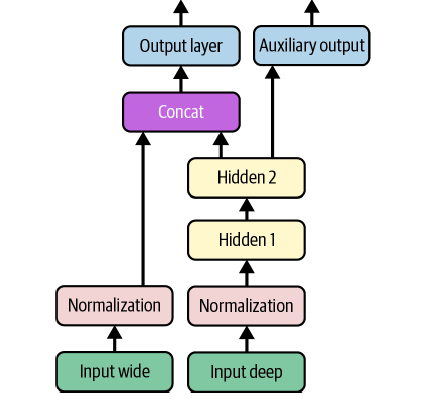
    

In [51]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])

output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs = [input_wide, input_deep],
                       outputs = [output, aux_output])

In [52]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss=("mse", "mse"), #or loss={"output": "mse", "aux_output": "mse"} assuming you created the output layers with name="output" and name="aux_output"
    loss_weights=(0.9, 0.1), #or loss_weights={"output": 0.9, "aux_output":0.1}
    optimizer=optimizer,
    metrics=["RootMeanSquaredError"]
)


In [53]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), 
    (y_train, y_train), # or {"output": y_train, "aux_output": y_train}, same goes for y_valid, y_test
    epochs=20,
    validation_data=(
        (X_valid_wide, X_valid_deep), 
        (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 4s 6ms/step - loss: 1.7139 - dense_2_loss: 1.6945 - dense_3_loss: 1.8880 - dense_2_root_mean_squared_error: 1.3017 - dense_3_root_mean_squared_error: 1.3740 - val_loss: 0.9982 - val_dense_2_loss: 1.0118 - val_dense_3_loss: 0.8762 - val_dense_2_root_mean_squared_error: 1.0059 - val_dense_3_root_mean_squared_error: 0.9360
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5526 - dense_2_loss: 0.5343 - dense_3_loss: 0.7178 - dense_2_root_mean_squared_error: 0.7309 - dense_3_root_mean_squared_error: 0.8472 - val_loss: 0.7279 - val_dense_2_loss: 0.7376 - val_dense_3_loss: 0.6402 - val_dense_2_root_mean_squared_error: 0.8589 - val_dense_3_root_mean_squared_error: 0.8001
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4599 - dense_2_loss: 0.4436 - dense_3_loss: 0.6062 - dense_2_root_mean_squared_error: 0.6660 - dense_3_root_mean_squared_error: 0.7786 - val_loss: 0.5490 - val_dense_2_loss

In [54]:
eval_results = model.evaluate(
    (X_test_wide, X_test_deep),
    (y_test, y_test)
)

weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

 82/162 [==============>...............] - ETA: 0s - loss: 0.3348 - dense_2_loss: 0.3293 - dense_3_loss: 0.3843 - dense_2_root_mean_squared_error: 0.5738 - dense_3_root_mean_squared_error: 0.6199

162/162 [==============================] - 1s 4ms/step - loss: 0.3283 - dense_2_loss: 0.3226 - dense_3_loss: 0.3799 - dense_2_root_mean_squared_error: 0.5680 - dense_3_root_mean_squared_error: 0.6164


In [55]:
print(weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse)

0.3283410370349884 0.3226102292537689 0.37991809844970703 0.567987859249115 0.6163749694824219


In [56]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
print(y_pred_main, y_pred_aux)

1/1 [==============================] - 0s 145ms/step
[[0.2693989]
 [1.0289365]
 [3.6298966]] [[0.35938844]
 [1.0042055 ]
 [3.483325  ]]


In [57]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))
y_pred

1/1 [==============================] - 0s 49ms/step


{'dense_2': array([[0.2693989],
        [1.0289365],
        [3.6298966]], dtype=float32),
 'dense_3': array([[0.35938844],
        [1.0042055 ],
        [3.483325  ]], dtype=float32)}

### B.4. Using the Subclassing API to Build Dynamic Models:

* Both the sequential API and the functional API are declarative: you start by declaring which layers you want to use and how they should be connected, and only then can you start feeding the model some data for training or inference.
    * The model can be easily saved, cloned and shared; its structure can be displayed and analyzed; the framework can infer shapes and check types, so errors can be caught early (i.e., before any data ever goes through the model).
    * It's also fairly straightforward to debug, since the whole model is a static graph of layers. 
    * But the filp side is just that it's static. 

* Subclassing API:
    * Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors.
    * This approach is done by sublcassing the `Model` class, creating the layers you need in the constructor, and using them to perform the computations you want in the `call()` method.

In [58]:
tf.keras.backend.clear_session()
import tensorflow.keras.layers as tkl

class WideAndDeepModel(tf.keras.Model):

    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # to support naming the model
        self.norm_layer_wide = tkl.Normalization()
        self.norm_layer_deep = tkl.Normalization()
        self.hidden1 = tkl.Dense(units, activation=activation)
        self.hidden2 = tkl.Dense(units, activation=activation)
        self.main_output = tkl.Dense(1)
        self.aux_output = tkl.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tkl.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)

        return output, aux_output

In [59]:
model = WideAndDeepModel(30, activation="relu", name="wad_model_1")

In [60]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss="mse",
    loss_weights=[0.9, 0.1],
    optimizer=optimizer,
    metrics=['RootMeanSquaredError']
)
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)


In [61]:
history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=10,
    validation_data=(
        (X_valid_wide, X_valid_deep),
        (y_valid, y_valid)
    )
)
eval_results=model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10


363/363 [==============================] - 4s 5ms/step - loss: 1.7561 - output_1_loss: 1.7552 - output_2_loss: 1.7650 - output_1_root_mean_squared_error: 1.3248 - output_2_root_mean_squared_error: 1.3285 - val_loss: 0.9844 - val_output_1_loss: 0.7460 - val_output_2_loss: 3.1307 - val_output_1_root_mean_squared_error: 0.8637 - val_output_2_root_mean_squared_error: 1.7694
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6072 - output_1_loss: 0.5894 - output_2_loss: 0.7670 - output_1_root_mean_squared_error: 0.7677 - output_2_root_mean_squared_error: 0.8758 - val_loss: 1.7603 - val_output_1_loss: 1.5260 - val_output_2_loss: 3.8690 - val_output_1_root_mean_squared_error: 1.2353 - val_output_2_root_mean_squared_error: 1.9670
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5030 - output_1_loss: 0.4879 - output_2_loss: 0.6393 - output_1_root_mean_squared_error: 0.6985 - output_2_root_mean_squared_error: 0.7996 - val_loss: 0.6235 - val_out

In [62]:
model.summary()

Model: "wad_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  multiple                 11        
 n)                                                              
                                                                 
 normalization_1 (Normalizat  multiple                 13        
 ion)                                                            
                                                                 
 dense (Dense)               multiple                  210       
                                                                 
 dense_1 (Dense)             multiple                  930       
                                                                 
 dense_2 (Dense)             multiple                  36        
                                                                 
 dense_3 (Dense)             multiple                  

### B.5. Saving and Restoring a Model:

* `model.save("model_name", save_format="tf")`
    * `save_format="tf"`
        * Keras saves the model using TensorFlow's *Saved-Model format*.
        * This is a directory (w/ the given name) containing several files and subdirectories.
        * The *saved_model.pb* file contains the model's architecture and logic in the form of a serialized computation graph.
        * The *keras_metadata.pb* file contains extra information needed by Keras. 
        * The *variables* subdirectory contains all the parameter values(including the connection weights, the biases, the normalization statistics, and the optimizer's parameters), possibly split across multiple files if the model is very large.
        * The *assets* directory may contain extra files, such as data samples, feature names, class names, and so on. By default, this directory is empty.

* If `save_format="h5"` is set a filename that ends w/ *.h5, .hdf5, .keras*, then Keras will save the model to a single file using a Keras-specific format based on the HDF5 format. However, most TensorFlow deployment tools require the SavedModel format instead.
* You will typically have a script that trains a model and saves it, and one or more scripts (or web services) that load the model and use it to evaluate it or to make predictions.
* `save_weights()` and `load_weights()`:
    * save and load only the parameter values. This includes the connection weights, biases, preprocessing stats, optimizer state, etc.
    * Saving just the weights is faster and uses less disk space than saving the whole model, so it’s perfect to save quick checkpoints during training.
    * If you’re training a big model, and it takes hours or days, then you must save checkpoints regularly in case the computer crashes.

In [63]:
model.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model\assets


In [64]:
model_loaded = tf.keras.models.load_model("my_keras_model")

In [65]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 63ms/step


In [66]:
print(y_pred_main)

[[0.3089454]
 [1.3193473]
 [3.4321253]]


In [67]:
print(y_pred_aux)

[[0.66751766]
 [1.3678529 ]
 [3.1130972 ]]


### B.6. Using Callbacks:

* The `fit()` method accepts a `callback` argument that lets you specify a list of objects that Keras will call before and after training, before and after each epoch,  and even before and after processing each batch.

* `ModelCheckpoint` callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch:
    * If validation set is used during training, you can set `save_best_only=True` when creating the `ModelCheckpoint`. It will only save your model when its performance on the validation set is the best so far. Thi is one way to implement early stopping.

* `EarlyStopping` callback will interrrupt training when it measures no progress on the validation set for a number of epochs(defined by the `patience` argument).
    * if `restore_best_weights=True`, it will roll back to the best model at the end of training.

* Both callbacks `EarlyStopping` and `ModelCheckpoint` can be combined to save checkpoints of the model in case the computer crahses, and interrupt training early when there is no more progress, to avoid wasting time and resources and to reduce overfitting.
    * The number of epochs can be set to a large value since training will stop automaticlly when there is no more progress(and learning rate should not be too small).
    * The `EarlyStopping` callback will store the weights of the best model in RAM, and it will restore them at the end of training.

* Other callbacks are available in the `tf.keras.callbacks`

* Custom Callbacks can be created by inheriting from the `tf.keras.callbacks.Callback`.
    * You can implement `on_train_begin(), on_train_end(), on_epoch_begin(), on_epoch_end(), on_batch_begin(), on_batch_end()`.
    * Callbacks can also be used during evaluation and predictions (e.g., for debugging).
    * For evaluation, implement `on_test_begin(), on_test_end(), on_test_batch_begin()` or `, on_test_batch_end()`, w/c are called by `evaluate()`.
    * For prediction, implement `on_predict_begin(), on_predict_end(), on_predict_batch_begin(),` or `on_predict_batch_end()`, w/c are called by `predict()`.

In [68]:
# Saving checkpoints
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints", save_weights_only=True)

history = model.fit(
    (X_train_wide, X_train_deep), 
    (y_train, y_train), 
    epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
352/363 [============================>.] - ETA: 0s - loss: 0.3660 - output_1_loss: 0.3576 - output_2_loss: 0.4416 - output_1_root_mean_squared_error: 0.5980 - output_2_root_mean_squared_error: 0.6645

363/363 [==============================] - 2s 6ms/step - loss: 0.3674 - output_1_loss: 0.3592 - output_2_loss: 0.4419 - output_1_root_mean_squared_error: 0.5993 - output_2_root_mean_squared_error: 0.6648 - val_loss: 0.6083 - val_output_1_loss: 0.6227 - val_output_2_loss: 0.4792 - val_output_1_root_mean_squared_error: 0.7891 - val_output_2_root_mean_squared_error: 0.6922
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3593 - output_1_loss: 0.3515 - output_2_loss: 0.4300 - output_1_root_mean_squared_error: 0.5929 - output_2_root_mean_squared_error: 0.6557 - val_loss: 0.7334 - val_output_1_loss: 0.7455 - val_output_2_loss: 0.6245 - val_output_1_root_mean_squared_error: 0.8634 - val_output_2_root_mean_squared_error: 0.7903
Epoch 3/10
363/363 [==============================] - 3s 7ms/step - loss: 0.3572 - output_1_loss: 0.3499 - output_2_loss: 0.4230 - output_1_root_mean_squared_error: 0.5915 - output_2_root_mean_squared_error: 0.6504 - val_loss: 0.4040 - val_out

In [70]:
# Early stopping 
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    (X_train_wide, X_train_deep), 
    (y_train, y_train), 
    epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
 21/363 [>.............................] - ETA: 0s - loss: 0.3171 - output_1_loss: 0.3138 - output_2_loss: 0.3461 - output_1_root_mean_squared_error: 0.5602 - output_2_root_mean_squared_error: 0.5883

363/363 [==============================] - 2s 5ms/step - loss: 0.3236 - output_1_loss: 0.3176 - output_2_loss: 0.3781 - output_1_root_mean_squared_error: 0.5635 - output_2_root_mean_squared_error: 0.6149 - val_loss: 0.8446 - val_output_1_loss: 0.8732 - val_output_2_loss: 0.5864 - val_output_1_root_mean_squared_error: 0.9345 - val_output_2_root_mean_squared_error: 0.7658
Epoch 2/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3277 - output_1_loss: 0.3221 - output_2_loss: 0.3784 - output_1_root_mean_squared_error: 0.5675 - output_2_root_mean_squared_error: 0.6152 - val_loss: 0.6647 - val_output_1_loss: 0.6939 - val_output_2_loss: 0.4022 - val_output_1_root_mean_squared_error: 0.8330 - val_output_2_root_mean_squared_error: 0.6342
Epoch 3/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3243 - output_1_loss: 0.3189 - output_2_loss: 0.3735 - output_1_root_mean_squared_error: 0.5647 - output_2_root_mean_squared_error: 0.6111 - val_loss: 0.8741 - val_o

FailedPreconditionError: Failed to rename: checkpoint.tmp9c85d7a3274340a48d22f513ab2c2c83 to: checkpoint : The process cannot access the file because it is being used by another process.
; Broken pipe

In [71]:
#Custom Callback

class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio=logs["val_loss"]/logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [72]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb],
    verbose=0
)

Epoch=0, val/train=3.43
Epoch=1, val/train=3.12
Epoch=2, val/train=1.20
Epoch=3, val/train=1.09
Epoch=4, val/train=1.74
Epoch=5, val/train=2.14
Epoch=6, val/train=1.83
Epoch=7, val/train=2.52
Epoch=8, val/train=1.58
Epoch=9, val/train=2.30


### B.7. Using TensorBoard for Visualization:

* **TensorBoard** is a great interactive visualization tool that you can use to view the learning curves during training, compare curves and metrics between multiple runs, visualize the computation graph, analyze training statistics, view images generated by your model, visualize complex multidimensional data projected down to 3D and automatically clustered for your, profile your network(i.e., meausre its speed to identify bottlenecks).

* To use TensorBoard, you must modify your program so that it outputs the data you want to visualize to special binary logfiles called *event files*.
    * Each binary data record is called a *summary*.
    * The TensorBoard server will monitor the log directory, and it will automatically pick up the changes and update the visualization.
    * In general, point the TensorBoard server to a root log directory and configure your program so that it writes to a different subdirectory everytime it runs. This way, the same TensorBoard server instance will allow you to visualize and compare data from multiple runs of your program, w/o getting everyting mixed up.
    * `TensorBoard()` callback that takes care of creating the log directory (along w/ its parent directories if needed), and it will create event files and write summaries to them during training. It will measure your model's training and validation loss and metrics and it will also profile your neural network.
        * `profile_batch` should be big enough for the neural network to warm up, and profiling uses resources, so it's best not to do it for every batch.
        * Create one directory per run, each containing one subdirectory for training logs and one for validation logs. Both containing event files, and the training logs also include profiling traces.

* Running the TensorBoard in Jupyternotebook: <br>
    * The server listens on the first available TCP port greater than or equal to 6006 (or set the port you want using the `--port` option). <br>
    &emsp; `%load_ext tensorboard` <br>
    &emsp; `tensorbaord --logdir=./my_logs`

    * To run Tensorboard in VSCode:
        1. Open the command palette (CTRL + Shift + P)
        2. Search for the command  “Python: Launch TensorBoard” and press enter.
        3. You will be able to select the folder where your TensorBoard log files are located. By default, the current working directory will be used.

* TensorBoard:
    * View the learning curves in the SCALAR Tab.
    * You can also visualize the whole computation graph in the GRAPHS tab.
    * The learned weights are projected to 3D in the PROJECTOR tab.
    * Profiling traces are available in the PROFILE tab.

In [73]:
# Generate the path of the log subdirectory based on the current date and time
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir = "my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")
 
run_logdir = get_run_logdir() # e.g., my_logs/run_2022_08_01_17_25_59

In [ ]:
# using tensor board callback
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3) #original 1e-1
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))
history = model.fit(X_train, y_train, 
                    epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 8s 19ms/step - loss: 2.0727 - root_mean_squared_error: 1.4397 - val_loss: 2.5347 - val_root_mean_squared_error: 1.5921
Epoch 2/20
363/363 [==============================] - 3s 7ms/step - loss: 0.6955 - root_mean_squared_error: 0.8340 - val_loss: 0.9422 - val_root_mean_squared_error: 0.9707
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.6070 - root_mean_squared_error: 0.7791 - val_loss: 0.6111 - val_root_mean_squared_error: 0.7817
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5662 - root_mean_squared_error: 0.7525 - val_loss: 0.5480 - val_root_mean_squared_error: 0.7403
Epoch 5/20
363/363 [==============================] - 3s 7ms/step - loss: 0.5389 - root_mean_squared_error: 0.7341 - val_loss: 0.4923 - val_root_mean_squared_error: 0.7017
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5146 - root_mean_squared_error: 0.7173 - val_loss: 0.4708 - val

In [74]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2023_10_29_17_36_51
    events.out.tfevents.1698572880.JCA.profile-empty
    plugins
      profile
        2023_10_29_09_48_00
          JCA.input_pipeline.pb
          JCA.kernel_stats.pb
          JCA.memory_profile.json.gz
          JCA.overview_page.pb
          JCA.tensorflow_stats.pb
          JCA.trace.json.gz
          JCA.xplane.pb
        2023_10_29_09_51_48
          JCA.input_pipeline.pb
          JCA.kernel_stats.pb
          JCA.memory_profile.json.gz
          JCA.overview_page.pb
          JCA.tensorflow_stats.pb
          JCA.trace.json.gz
          JCA.xplane.pb
        2023_10_29_09_55_12
          JCA.input_pipeline.pb
          JCA.kernel_stats.pb
          JCA.memory_profile.json.gz
          JCA.overview_page.pb
          JCA.tensorflow_stats.pb
          JCA.trace.json.gz
          JCA.xplane.pb
    train
      events.out.tfevents.1698572876.JCA.29076.0.v2
      events.out.tfevents.1698573100.JCA.29076.2.v2
      events.out.tfevents.1698573301.JCA.

In [ ]:
# Load the the tensorboard
%load_ext tensorboard
%tensorboard --logdir=./my_logs

In [75]:
# log scalars, histograms, images, audio, and text
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))

with writer.as_default():
    for step in range(1, 1000+1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)

        data = (np.random.randn(100) + 2) * step / 100 # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)

        images = np.random.rand(2, 32, 32, 3) * step / 1000 # gets brighter
        tf.summary.image("my_images", images, step=step)

        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)

        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

# C. Fine-Tuning Neural Network Hyperparameters:

* The flexibility of neural networks is also one of their main drawbacks: there are many hyperparameters to tweak.
* Not only can you use any imaginable network architecture, but even in a basic MLP you can change the number of layers, the number of neurons and the type of activation function to use in each layer, the weight initialization logic, the type of optimizer to use, its learning rate, the batch size, and more.

* How do your know what combination of hyperparameters is the best for your task?
    * One option is to convert the Keras model to a Scikit-Learn estimator, and use `GridSearchCV` or `RandomSearchCV` to fine-tune the hyperparameters.
    * Or a better ways is to use the `Keras Tuner` library, w/c is a hyperparameter tuning library for Keras Models.

* Using Keras Tuner
    * `import keras_tuner as kt`
    *  Write a function that builds, compiles, and returns a Keras Model. The function must take a `kt.HyperParameters` object as an argument, w/c take a `kt.HyperParameters` object as an argument, w/c it can use to define hyperparameters along w/ their range of possible values. These hyperparameters may be used to build and compile the model.
    * Then pass this to a keras tuner such as `kt.RandomSearch`

* Oracle

In [76]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [77]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [78]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default = 2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer=="sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):  
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu")) # add hidden layers
    model.add(tf.keras.layers.Dense(10, activation="softmax"))         # Add output layer
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

Using TensorFlow backend


In [79]:
random_search_tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5, 
    overwrite=True,
    directory = "my_fashion_mnist",
    project_name="my_rnd_search",
    seed=42
)

random_search_tuner.search(
    X_train, y_train,
    epochs=10,
    validation_data = (X_valid, y_valid)
)

Trial 5 Complete [00h 01m 23s]
val_accuracy: 0.8388000130653381

Best val_accuracy So Far: 0.8633999824523926
Total elapsed time: 00h 07m 11s


In [ ]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [ ]:
best_model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 100,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 100,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_reg

In [ ]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

In [ ]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8604000210762024


In [ ]:
best_trial.metrics.get_last_value("val_accuracy")

0.8604000210762024